In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Data/Historical Product Demand.csv', parse_dates = ['Date'], index_col = ['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2012-07-27 to 2016-06-27
Data columns (total 4 columns):
Product_Code        1048575 non-null object
Warehouse           1048575 non-null object
Product_Category    1048575 non-null object
Order_Demand        1048575 non-null object
dtypes: object(4)
memory usage: 40.0+ MB


I first sort the data by the date, then drop nan values and change the value with () to negative value in column Order_Demand

In [2]:
data.sort_values(by=['Date'], inplace=True)
data2 = data[data.index.notnull()]
data2['Order_Demand'] = data2['Order_Demand'].replace('[(]', '-', regex=True).astype(str)
data2['Order_Demand'] = data2['Order_Demand'].replace('[)]', '', regex=True).astype(int)
data2

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2011-01-08,Product_0965,Whse_A,Category_006,2
2011-05-31,Product_1724,Whse_A,Category_003,108
2011-06-24,Product_1521,Whse_S,Category_019,85000
2011-06-24,Product_1521,Whse_S,Category_019,7000
2011-09-02,Product_1507,Whse_C,Category_019,1250
...,...,...,...,...
2017-01-06,Product_1710,Whse_J,Category_026,15
2017-01-06,Product_1359,Whse_J,Category_019,100000
2017-01-09,Product_0250,Whse_C,Category_007,148


D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


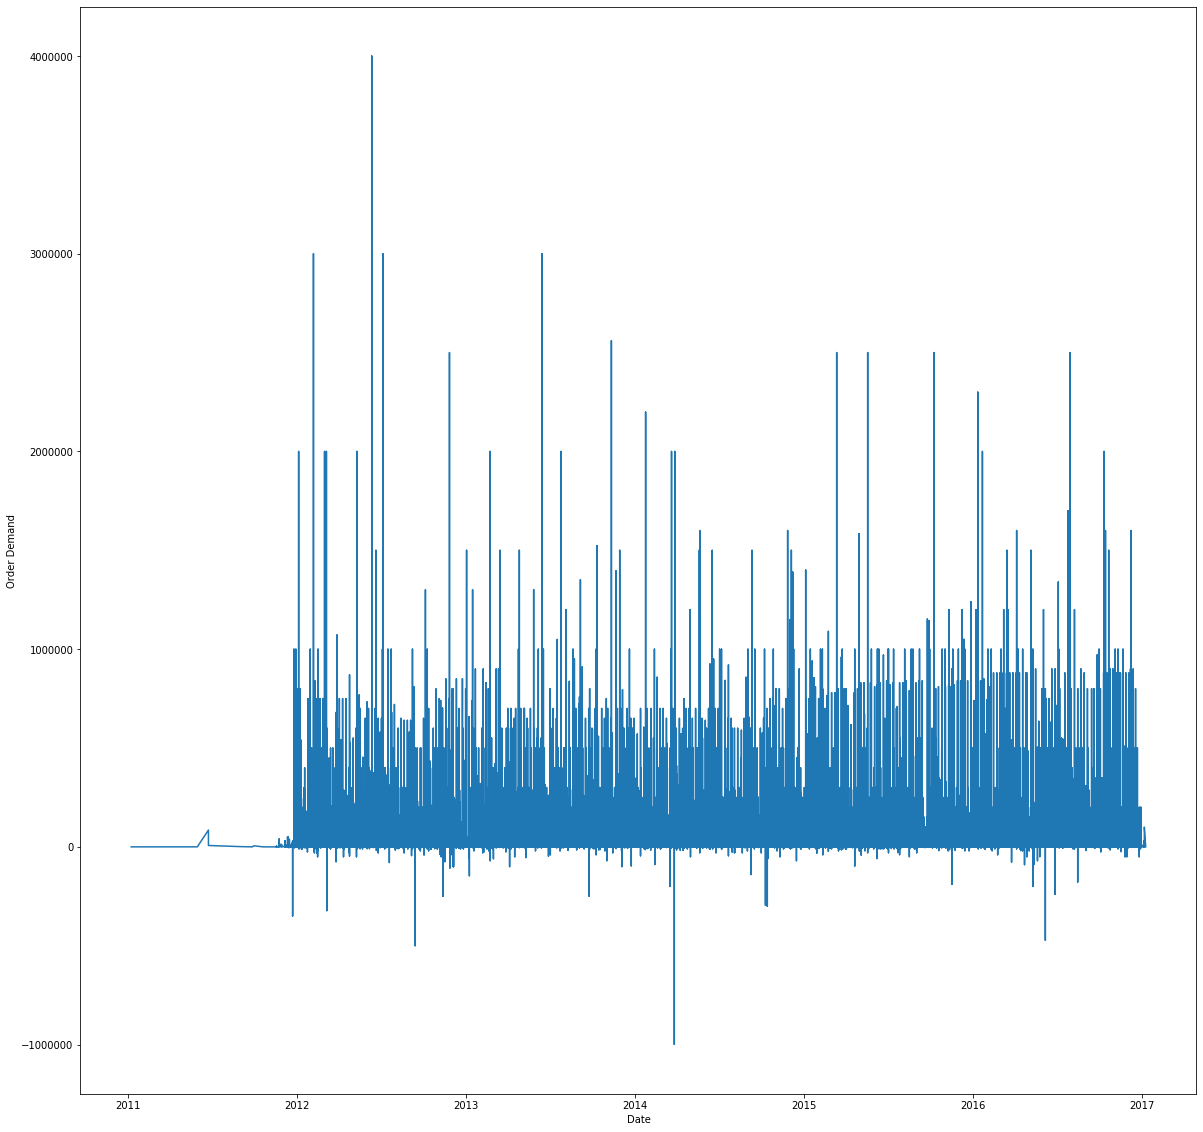

In [3]:
# plot order demand for all products
plt.figure(figsize=(20,20))
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.plot(data2['Order_Demand'])
plt.show()

Then I tried to find the most frequently appeared value in each column

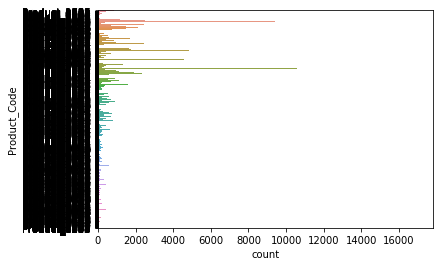

In [4]:
sns.countplot(y='Product_Code',data=data2)

The plot above cannot show which value is the most frequently appeared, so I then get the count of each values.

In [5]:
data2['Product_Code'].value_counts()

Product_1359    16936
Product_1295    10575
Product_1378     9770
Product_0620     9428
Product_1286     8888
                ...  
Product_1698        2
Product_2099        1
Product_1703        1
Product_0465        1
Product_0853        1
Name: Product_Code, Length: 2160, dtype: int64

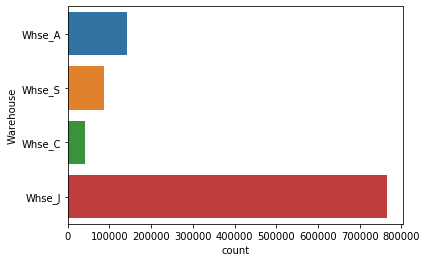

In [6]:
sns.countplot(y='Warehouse',data=data2)

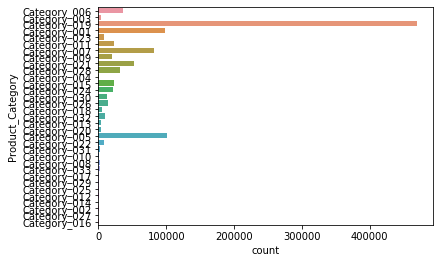

In [7]:
sns.countplot(y='Product_Category',data=data2)

In [8]:
data2['Product_Category'].value_counts()

Category_019    470266
Category_005    101627
Category_001     97787
Category_007     82402
Category_021     52008
Category_006     35552
Category_028     31012
Category_011     23208
Category_015     22954
Category_024     20885
Category_009     19738
Category_026     14771
Category_030     12997
Category_032      9296
Category_022      8657
Category_023      7899
Category_018      5239
Category_003      4189
Category_013      3743
Category_020      3490
Category_031      2268
Category_033      1849
Category_008      1560
Category_012      1147
Category_010       976
Category_029       671
Category_017       615
Category_004       329
Category_002        77
Category_016        37
Category_025        35
Category_014        26
Category_027        26
Name: Product_Category, dtype: int64

As the plots and counters shows, the most frequently value for three features are 'Product_1359', 'Whse_J', 'Category_019', so then I used the order demand for these three feature values for forecasting

In [9]:
code_most = data2.loc[data2['Product_Code'] == 'Product_1359']['Order_Demand']
warehouse_most = data2.loc[data2['Warehouse'] == 'Whse_J']['Order_Demand']
category_most = data2.loc[data2['Product_Category'] == 'Category_019']['Order_Demand']

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.Order_Demand   No. Observations:                16935
Model:                 ARIMA(2, 1, 0)   Log Likelihood             -215361.610
Method:                       css-mle   S.D. of innovations          80660.189
Date:                Sun, 11 Oct 2020   AIC                         430731.219
Time:                        02:42:25   BIC                         430762.168
Sample:                             1   HQIC                        430741.427
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4287    314.095      0.014      0.989    -611.187     620.044
ar.L1.D.Order_Demand    -0.6529      0.007    -89.703      0.000      -0.667      -0.639
ar.L2.D.Orde

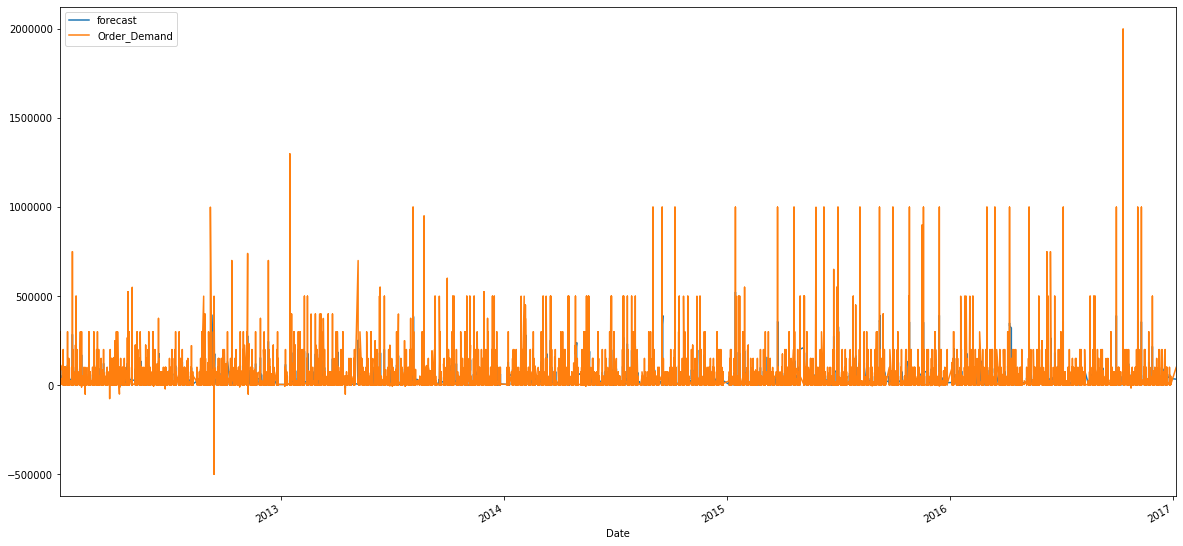

In [10]:
from statsmodels.tsa.arima_model import ARIMA
from pylab import rcParams
rcParams['figure.figsize'] = 20,10
code_model = ARIMA(code_most, order=(2,1,0))
code_result = code_model.fit()
print(code_result.summary())

code_result.plot_predict(dynamic = False)
plt.show()

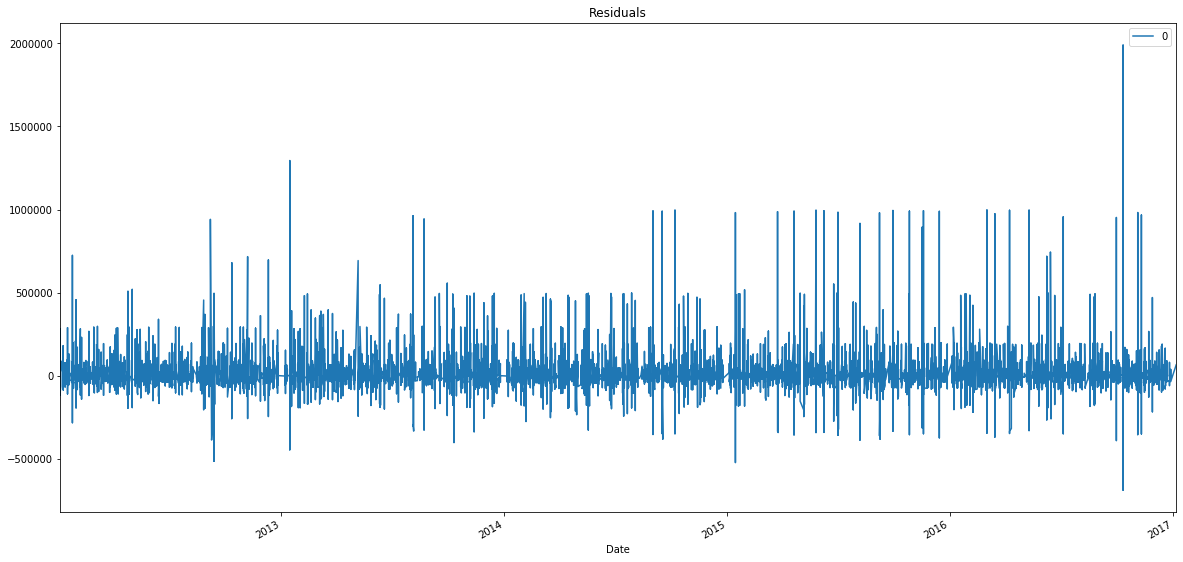

In [11]:
rcParams['figure.figsize'] = 20,10
code_residuals = pd.DataFrame(code_result.resid)
code_residuals.plot(title="Residuals")
plt.show()

As the plot of prediction and residual shows that the performance of ARIMA model is good, because most of the residual value are around 0. 

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.Order_Demand   No. Observations:               764446
Model:                 ARIMA(2, 1, 0)   Log Likelihood            -8803717.848
Method:                       css-mle   S.D. of innovations          24282.934
Date:                Sun, 11 Oct 2020   AIC                       17607443.696
Time:                        02:42:30   BIC                       17607489.884
Sample:                             1   HQIC                      17607456.545
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1284     14.002      0.009      0.993     -27.316      27.573
ar.L1.D.Order_Demand    -0.6562      0.001   -607.159      0.000      -0.658      -0.654
ar.L2.D.Orde

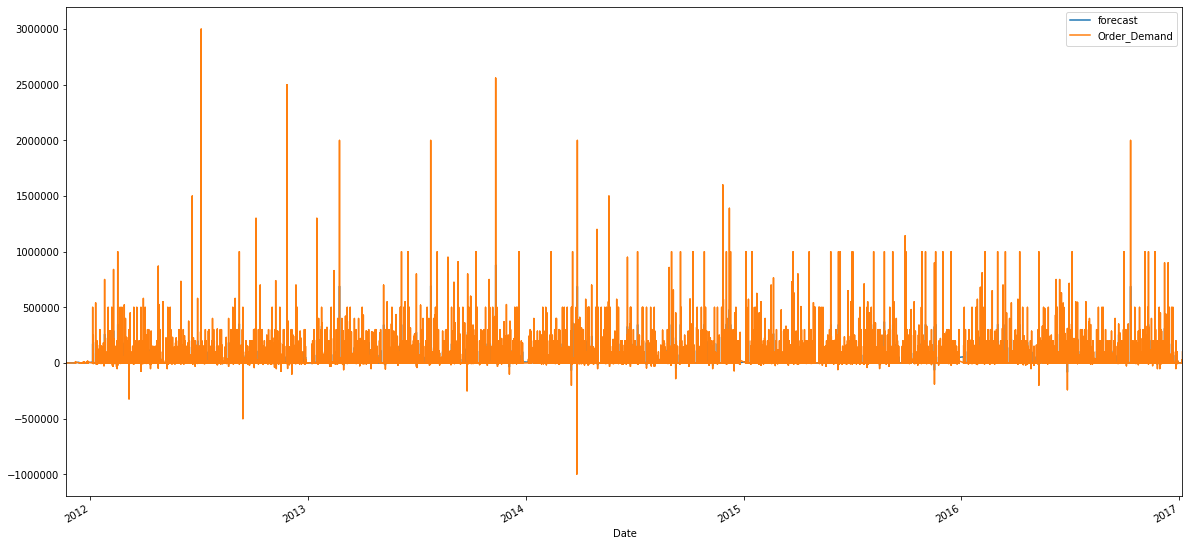

In [12]:
warehouse_model = ARIMA(warehouse_most, order=(2,1,0))
warehouse_result = warehouse_model.fit()
print(warehouse_result.summary())

rcParams['figure.figsize'] = 20,10
warehouse_result.plot_predict(dynamic = False)
plt.show()

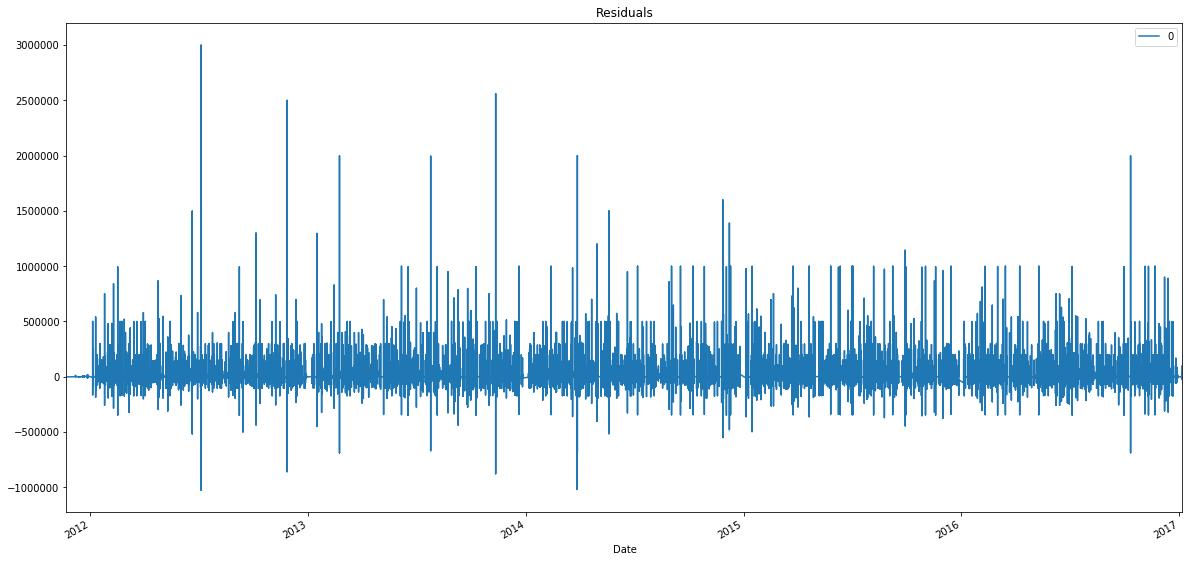

In [13]:
rcParams['figure.figsize'] = 20,10
warehouse_residuals = pd.DataFrame(warehouse_result.resid)
warehouse_residuals.plot(title="Residuals")
plt.show()

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.Order_Demand   No. Observations:               470265
Model:                 ARIMA(2, 1, 0)   Log Likelihood            -5721534.692
Method:                       css-mle   S.D. of innovations          46521.932
Date:                Sun, 11 Oct 2020   AIC                       11443077.384
Time:                        02:42:39   BIC                       11443121.629
Sample:                             1   HQIC                      11443089.941
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1722     34.926     -0.005      0.996     -68.626      68.281
ar.L1.D.Order_Demand    -0.6257      0.001   -452.390      0.000      -0.628      -0.623
ar.L2.D.Orde

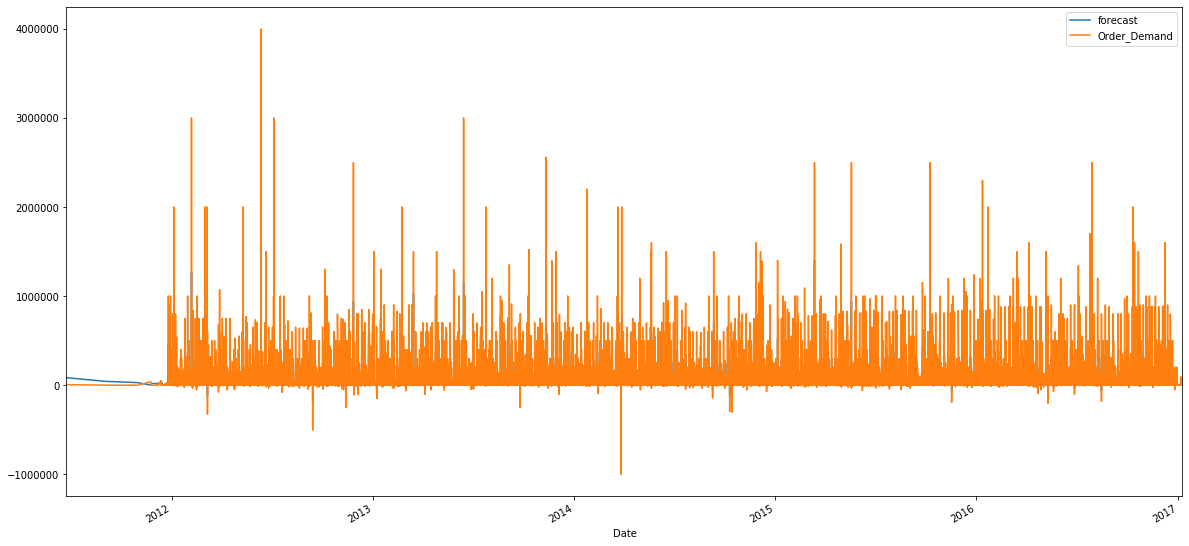

In [14]:
category_model = ARIMA(category_most, order=(2,1,0))
category_result = category_model.fit()
print(category_result.summary())

rcParams['figure.figsize'] = 20,10
category_result.plot_predict(dynamic = False)
plt.show()

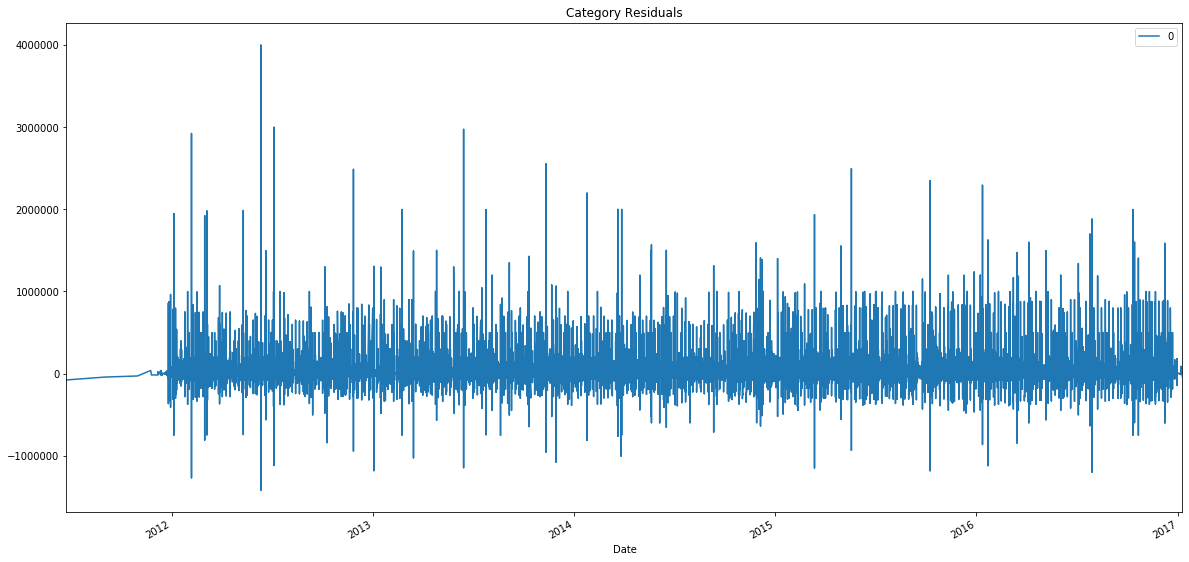

In [15]:
rcParams['figure.figsize'] = 20,10
category_residuals = pd.DataFrame(category_result.resid)
category_residuals.plot(title="Category Residuals")
plt.show()

For the previous plots, since it contains large number of instances, so in the plot, 'Order_Demand' plot is covered all 'forecast' plot, so we cannot see the performance very clear. Then I used a product with small amount, now we can see the performance of forecast vs. order_demand. 

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


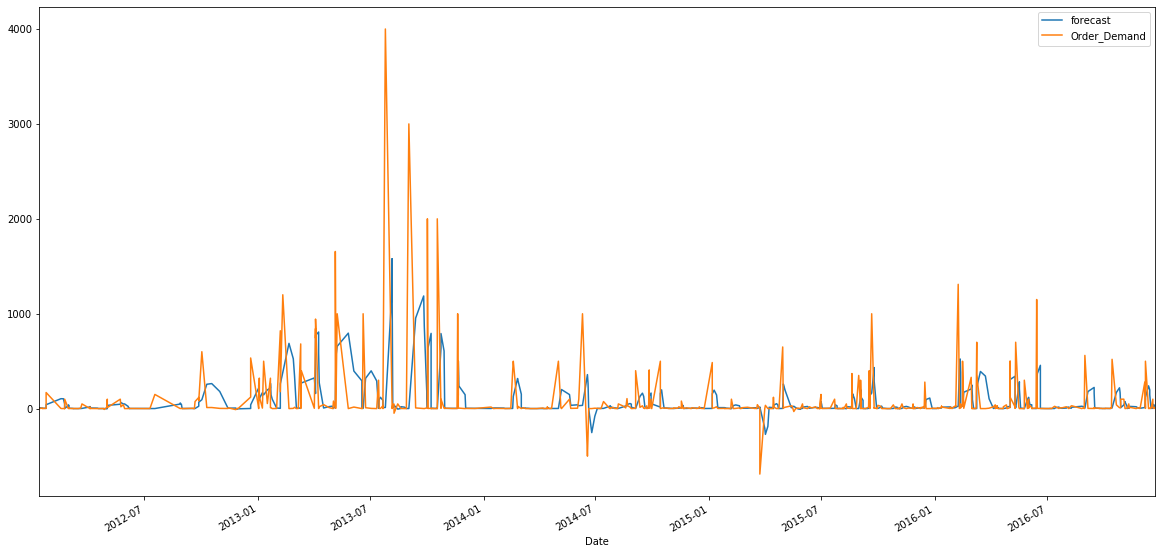

In [16]:
category_most_2 = data2.loc[data2['Product_Category'] == 'Category_017']['Order_Demand']
category_model_2 = ARIMA(category_most_2, order=(2,1,0))
category_result_2 = category_model_2.fit()
rcParams['figure.figsize'] = 20,10
category_result_2.plot_predict(dynamic = False)
plt.show()

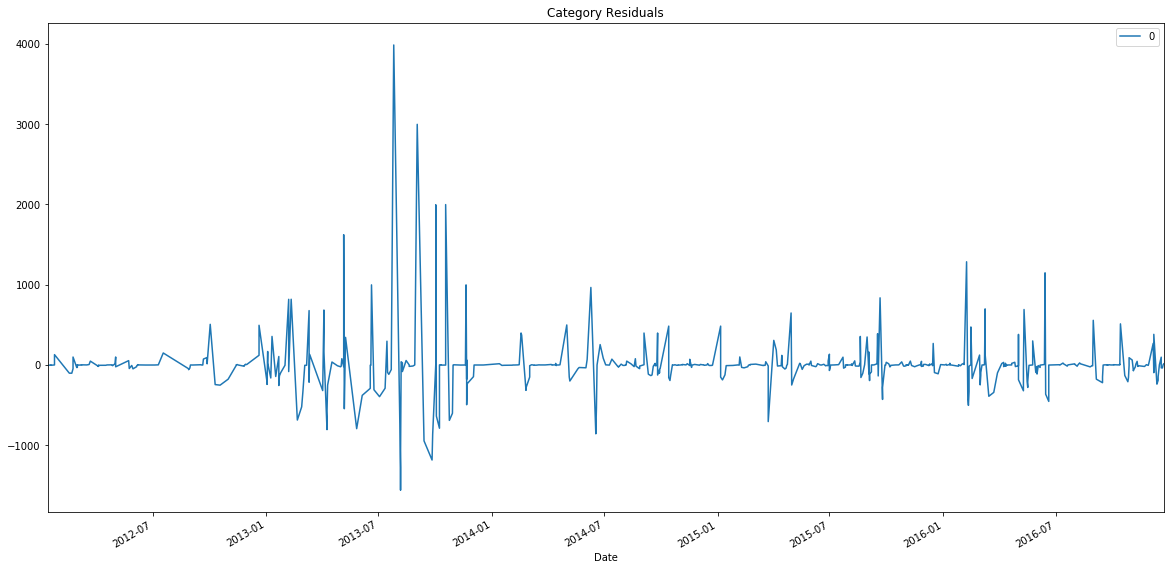

In [17]:
rcParams['figure.figsize'] = 20,10
category_residuals_2 = pd.DataFrame(category_result_2.resid)
category_residuals_2.plot(title="Category Residuals")
plt.show()